## **MENTAL HEALTH PREDICTION MODEL**

**NAME:** KADEEJATH SHRIN SHAHANA

**ORGANIZATION:** ENTRI ELEVATE

**DATE:** 12 Dec 2024

## **OVERVIEW OF PROBLEM STATEMENT**

Mental health issues are often underdiagnosed and untreated due to social stigma and lack of awareness. An effective machine learning model can help predict the likelihood of individuals seeking mental health treatment, enabling better proactive intervention strategies.

## **OBJECTIVE**

To develop a mental health treatment prediction model using machine learning techniques to classify individuals who are likely to seek treatment based on their demographic, occupational, and personal mental health factors.

## **DATA DESCRIPTION**

**SOURCE:**

**The dataset used in this project is obtained from [Kaggle] (https://www.kaggle.com).**

**Dataset Name:** Mental_Health_Dataset

**Direct Link: <Mental_Health_Dataset>(https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset/code).**

**Features:**

Timestamp: When the data was recorded.

Gender: Participant's gender.

Country: Participant's country.

Occupation: Participant's occupation.

self_employed: Indicates if the participant is self-employed.

family_history: Presence of family history of mental health issues.

treatment: Target variable indicating whether the participant sought treatment.

Days_Indoors: Time spent indoors.

Growing_Stress: Whether the participant feels increasing stress.

Changes_Habits: Changes in habits due to mental health.

Mental_Health_History: Past mental health history.

Mood_Swings: Intensity of mood swings.

Coping_Struggles: Difficulties coping with mental health.

Work_Interest: Interest in work.

Social_Weakness: Social difficulties related to mental health.

mental_health_interview: Indicates willingness to participate in a mental health interview.

care_options: Awareness of available care options.


**Demographic Information:** Gender, Country, Occupation.

**Behavioral and Health Factors:** Days_Indoors, Growing_Stress, Changes_Habits, Mental_Health_History, Mood_Swings, Coping_Struggles, Work_Interest, Social_Weakness.

**Awareness and Support:** mental_health_interview, care_options.

**Target Variable:** treatment.

## **DATA COLLECTION**

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np #for numerical computions

import matplotlib.pyplot as plt
import seaborn as sns #for data visualization

from sklearn.preprocessing import LabelEncoder, MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split #for data preprocessing

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    confusion_matrix,
) #for model evaluation

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier #for machine learning

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**IMPORT DATA**

In [2]:
data = pd.read_csv("Mental Health Dataset.csv")

**The dataset contains 292,364 entries with 17 features. It includes demographic, behavioral, and mental health-related attributes. The target variable treatment indicates whether a participant sought mental health treatment.**

In [5]:
df = pd.DataFrame(data)
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [7]:
df.head(10)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


**DATA INFORMATIONS**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [11]:
df.shape

(292364, 17)

In [13]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [15]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [17]:
df.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

## **DATA PREPROCESSING - DATA CLEANING**

**Check for missing values.**

In [19]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [21]:
print('Percentage of Missing values')
(df.isna().mean() * 100).round(1)

Percentage of Missing values


Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [23]:
df.dropna(inplace = True)

**Since the dataset has less than 2% (i.e; 5202) of missing data, dropping those rows will have minimal impact.**

In [25]:
df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

**Check for Duplicate entries.**

In [27]:
df.duplicated()

3         False
4         False
5         False
6         False
7         False
          ...  
292359    False
292360    False
292361    False
292362    False
292363    False
Length: 287162, dtype: bool

In [29]:
print(f"Number of Duplicates: {df.duplicated().sum()}")

Number of Duplicates: 2304


In [31]:
print('Percentage of Duplicates: {:.1%}'.format(df.duplicated().mean()))

Percentage of Duplicates: 0.8%


**#dropping duplicates**

In [33]:
df.drop_duplicates(inplace = True)

In [35]:
print('Number of Duplicates: {:,}'.format(df.duplicated().sum()))

Number of Duplicates: 0


**Drop unnecessary columns if any,**

**Since Timestamp does not influence prediction, dropping it.**

In [37]:
df.drop(columns = "Timestamp", inplace = True)

In [39]:
df.columns

Index(['Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
       'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
       'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
       'Work_Interest', 'Social_Weakness', 'mental_health_interview',
       'care_options'],
      dtype='object')

In [41]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


**CHECK FOR OUTLIERS**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284858 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Gender                   284858 non-null  object
 1   Country                  284858 non-null  object
 2   Occupation               284858 non-null  object
 3   self_employed            284858 non-null  object
 4   family_history           284858 non-null  object
 5   treatment                284858 non-null  object
 6   Days_Indoors             284858 non-null  object
 7   Growing_Stress           284858 non-null  object
 8   Changes_Habits           284858 non-null  object
 9   Mental_Health_History    284858 non-null  object
 10  Mood_Swings              284858 non-null  object
 11  Coping_Struggles         284858 non-null  object
 12  Work_Interest            284858 non-null  object
 13  Social_Weakness          284858 non-null  object
 14  mental_health_interview  

**Since the dataset contains only categorical (object) values, the concept of outliers does not apply. Instead, a thorough validation of category consistency and frequency distribution will be performed to ensure data quality.**

**DATA TRANSFORMATION AND ENCODING**

In [45]:
def countsplot(category):
  """
  Creates a count plot and returns a DataFrame with counts and percentages.

  Args:
      category (str): The column name for the categorical variable to plot.

  Returns:
      pandas.DataFrame: A DataFrame containing counts and percentages for each category.
  """

  # Create count plot with dynamic title
  sns.countplot(data = df, x = category)
  plt.ylabel("Count")
  plt.title(f"{category} Distribution")
  plt.show()

  # Calculate counts and percentages
  category_counts = df[category].value_counts()
  category_percentages = df[category].value_counts(normalize = True)

  # Combine counts and percentages into a DataFrame
  stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
  stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
  stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

  return stats_df

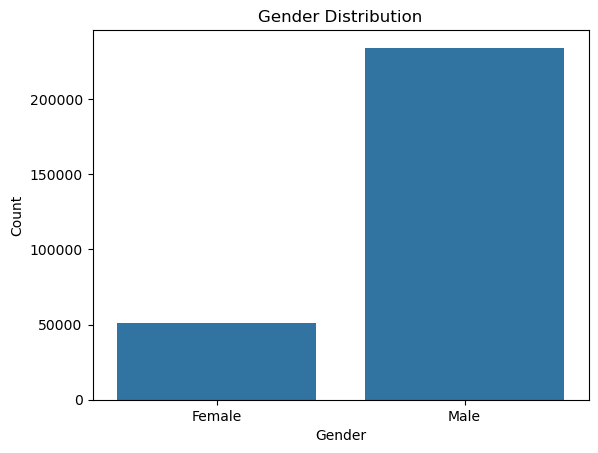

,Count,Proportion
Gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [47]:
countsplot("Gender")

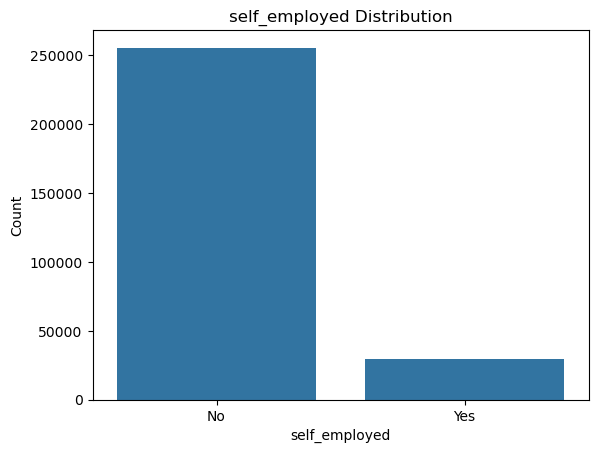

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [49]:
countsplot("self_employed")

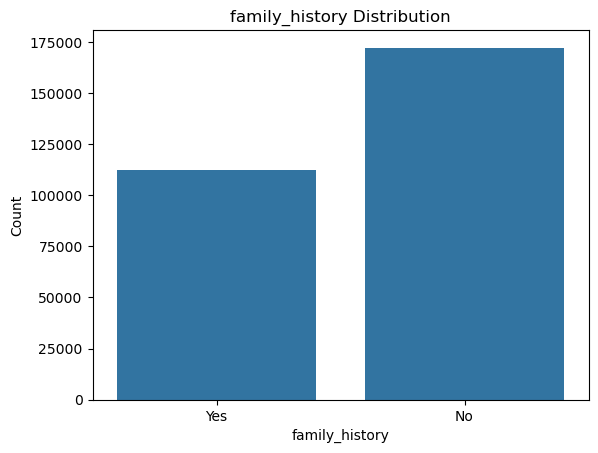

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [51]:
countsplot("family_history")

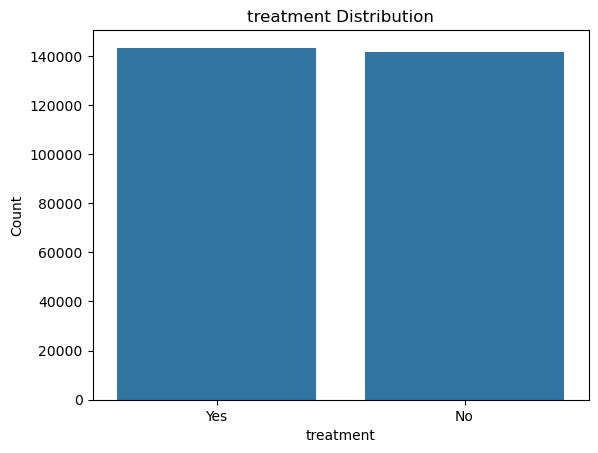

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [53]:
countsplot("treatment")

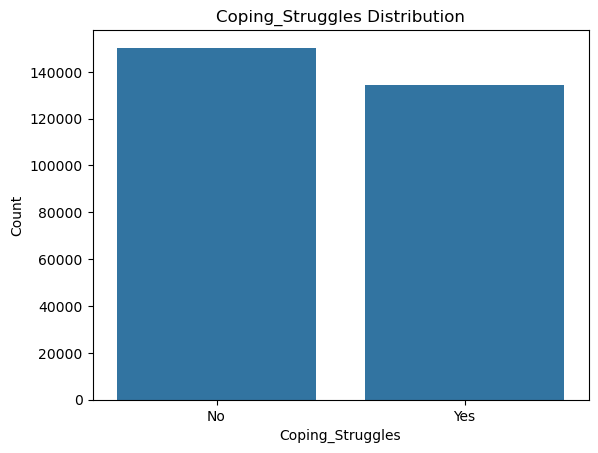

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [55]:
countsplot("Coping_Struggles")

In [57]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()

    # Plotting
    sns.barplot(data = top_10_df, x = category, y = "count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()

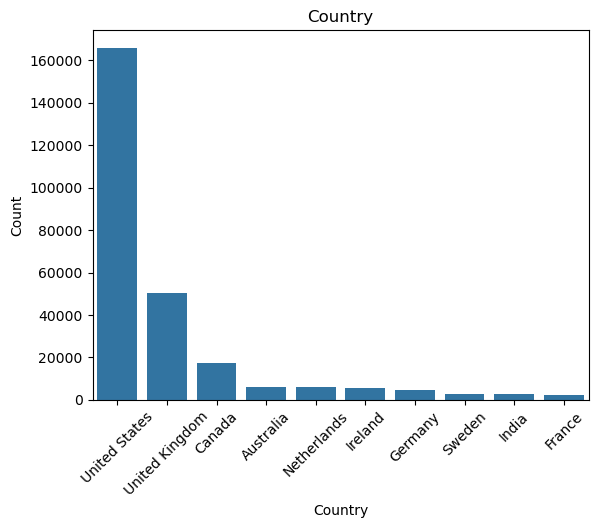

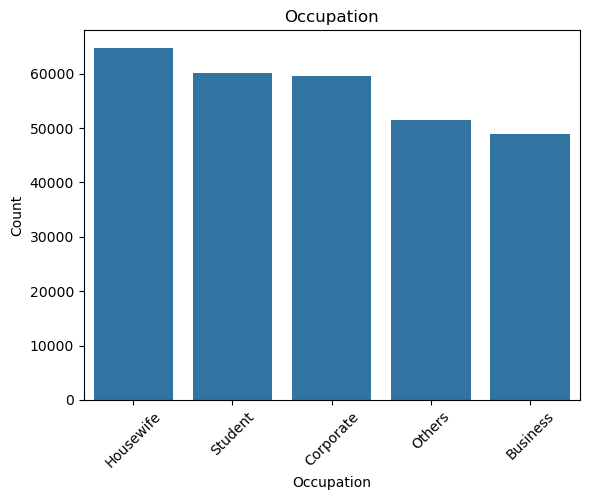

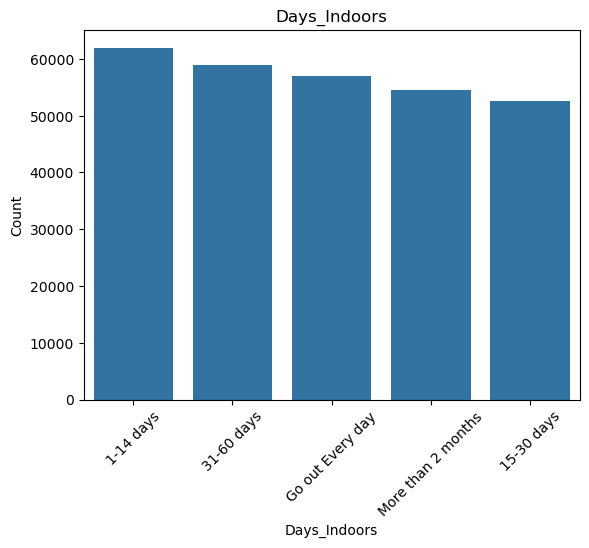

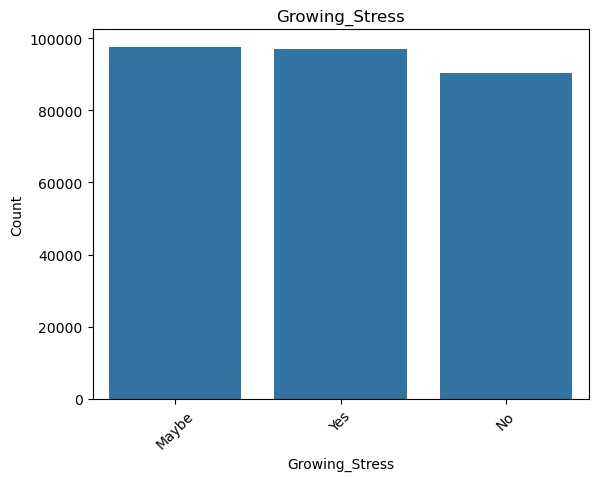

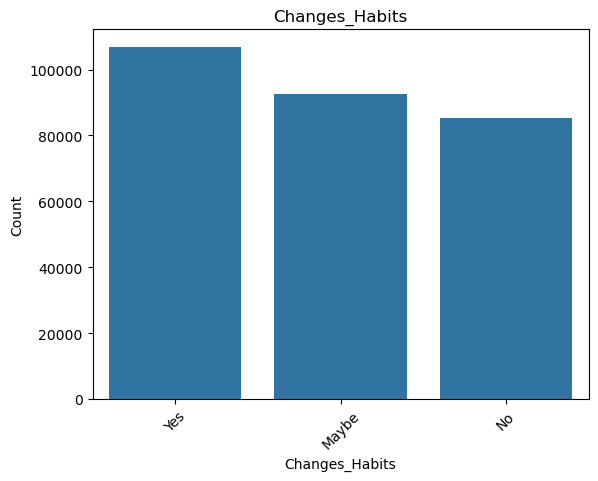

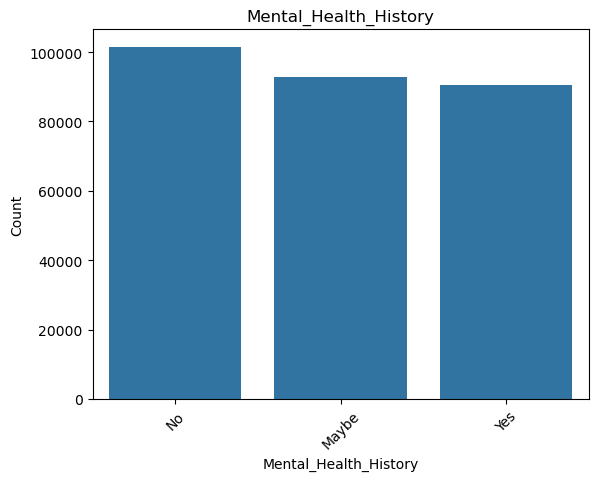

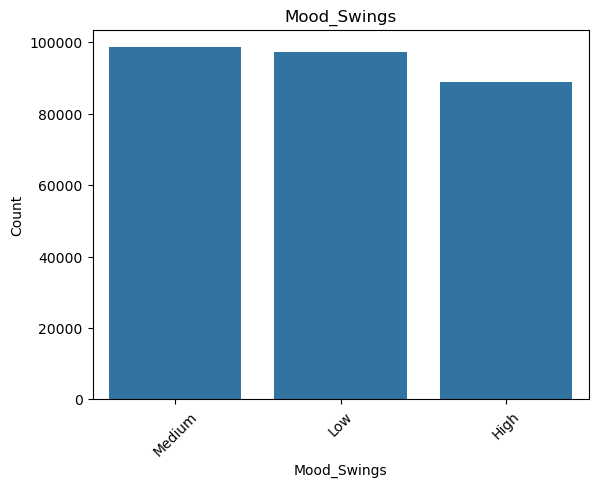

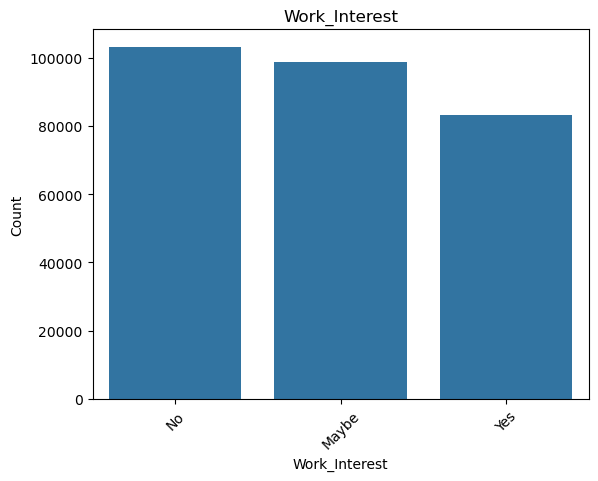

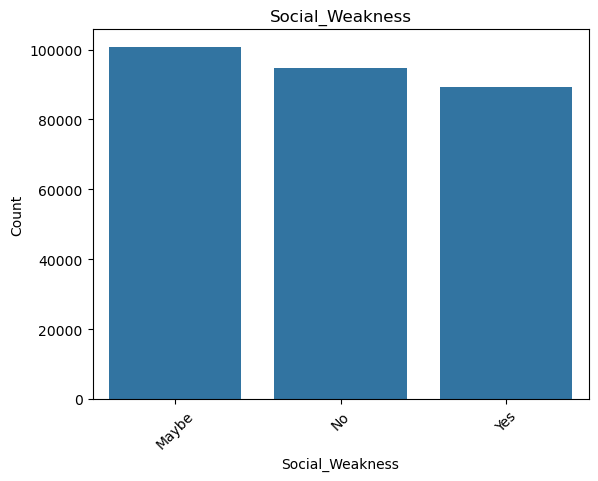

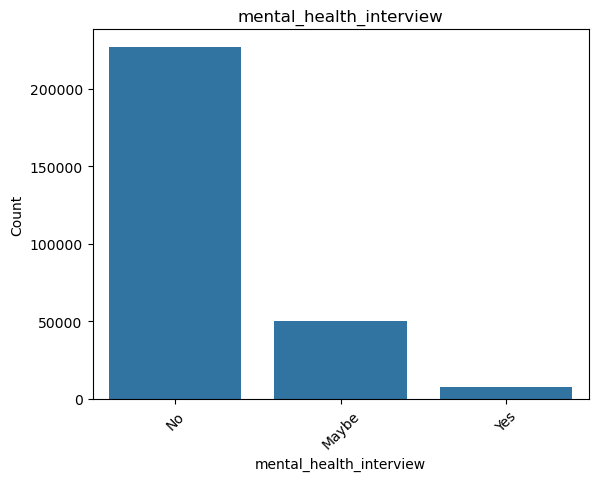

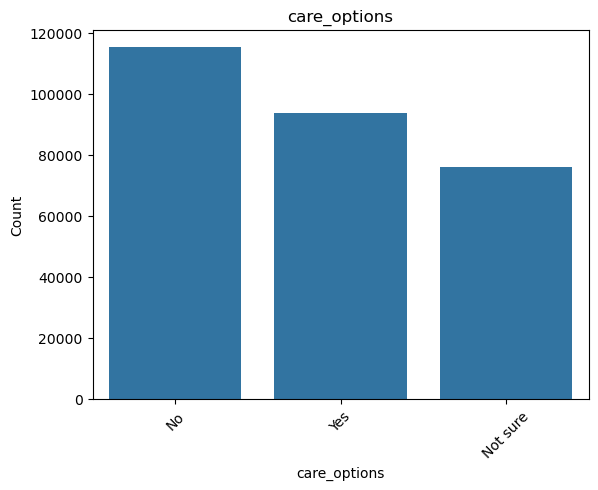

In [59]:
for column in df.columns:
    if df[column].nunique()>2:
        top_10_bar(column)

**# Grouping data by Gender and filtering it by Occupation and count occurrences.**

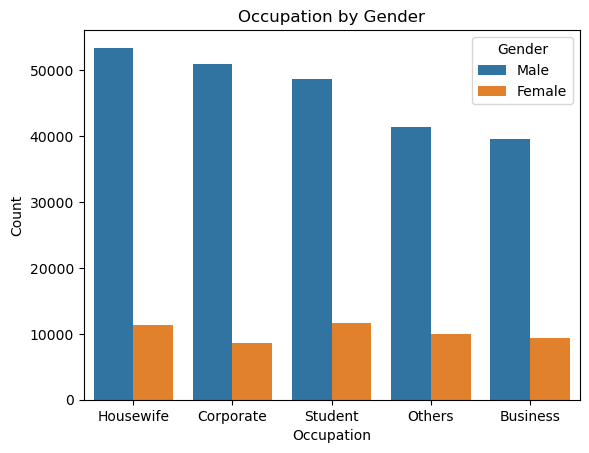

,Gender,Occupation,Count
5,Male,Housewife,53400
6,Male,Corporate,51000
7,Male,Student,48600
8,Male,Others,41400
9,Male,Business,39600
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [61]:
gender_data = (
    df
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
    .sort_values(by = "Count", ascending = False)
)

sns.barplot(data = gender_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data

**# Filter the Gender data to include only entries where the occupation is "Student".**

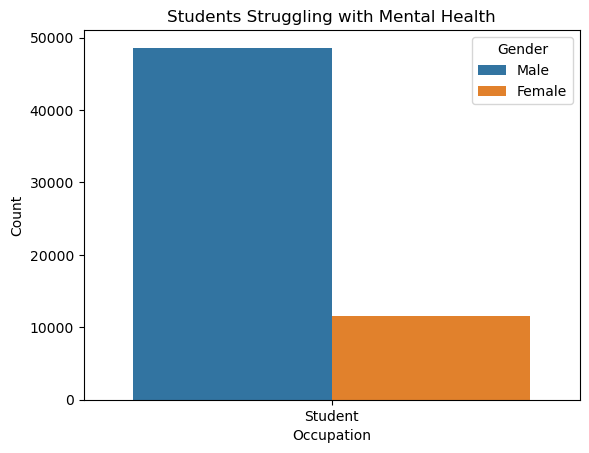

C:\Users\User\AppData\Local\Temp\ipykernel_1604\1085236242.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data["Percentage"] = (


,Gender,Occupation,Count,Percentage
7,Male,Student,48600,80.8
0,Female,Student,11564,19.2


In [63]:
student_data = gender_data[gender_data["Occupation"] == "Student"]

sns.barplot(data = student_data, x = "Occupation", y = "Count", hue = "Gender")
plt.title("Students Struggling with Mental Health")
plt.show()

# Get the total count
total_student_count = student_data["Count"].sum() 

# Calculate percentages based on gender counts
student_data["Percentage"] = (
    student_data["Gender"]
    .apply(
        lambda gender: round((student_data.loc[student_data["Gender"] == gender, "Count"].iloc[0] / total_student_count) * 100, 1)
    )
)

student_data

**# Filter the Data to include only Indian students and count occurrences by "Gender".**

In [65]:
indian_student_data = (
    df
    .loc[(df["Country"] == "India") & (df["Occupation"] == "Student")]
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name = "Count")
)

# Get the total count
total_indian_student_count = indian_student_data["Count"].sum() 

# Calculate percentages based on gender counts
indian_student_data["Percentage"] = (
    indian_student_data["Gender"]
    .apply(
        lambda gender: round((indian_student_data.loc[indian_student_data["Gender"] == gender, "Count"].iloc[0] / total_indian_student_count) * 100, 1)
    )
)

indian_student_data

,Gender,Occupation,Count,Percentage
0,Female,Student,98,16.8
1,Male,Student,486,83.2


**584 students from India is struggling with mental health issue, out of 60,164 students around the world.**

**# Calculate the percentage**

In [67]:
indian_student_count = 584
total_student_count = 60164

indian_percentage =(indian_student_count / total_student_count) * 100

print(f"The percentage of Indian students is {indian_percentage:.2f}%.") 

The percentage of Indian students is 0.97%.


**The percentage of Indian students (India) is comparatively low compared to the United States (58.4%).**

# **Exploratory Data Analysis (EDA)**

**Insights Gathered Through Visualizations:**

-For understanding the distribution of numerical variables.

-For detecting outliers.

-To examine correlations between features.

-For categorical feature distribution (e.g., Gender, treatment).

-To explore the relationship between categorical features and the target variable.

-For assessing data density and overlap between classes.


**# Gender distribution**

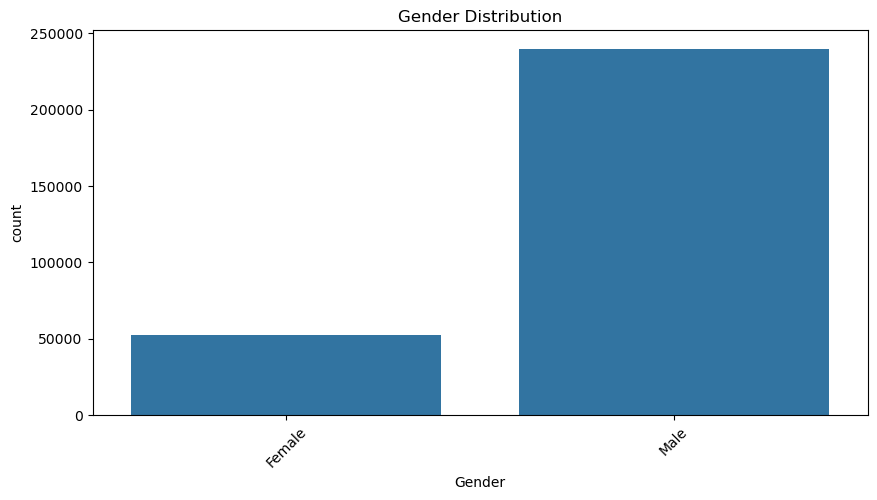

In [69]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

**# Heatmap for Correlations**

In [71]:
numeric_data = data.select_dtypes(include=['number'])

**#Plot heatmap for correlation of numeric columns**

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [73]:
print(numeric_data.shape)
print(numeric_data.columns)

(292364, 0)
Index([], dtype='object')


In [75]:
print(data.dtypes)

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


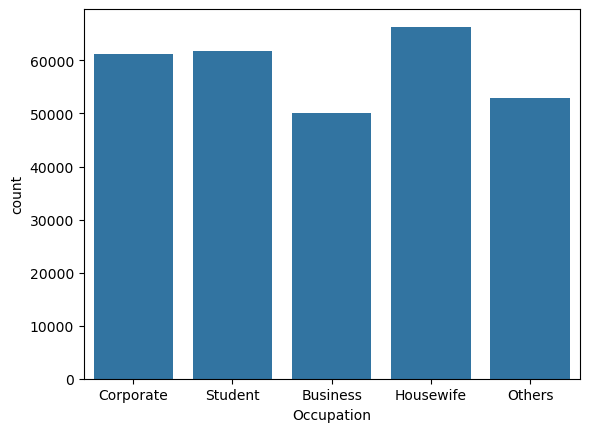

In [77]:
sns.countplot(x='Occupation', data=data)
plt.show()

**# Family history vs Treatment count plot**

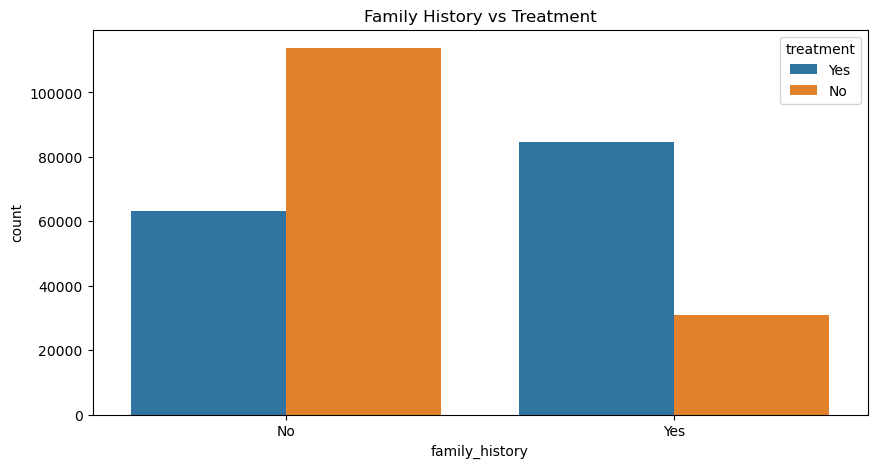

In [79]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='family_history', hue='treatment')
plt.title('Family History vs Treatment')
plt.show()

**# Countplot to analyze the distribution of each cateforical variable.**

<Axes: xlabel='Gender', ylabel='count'>

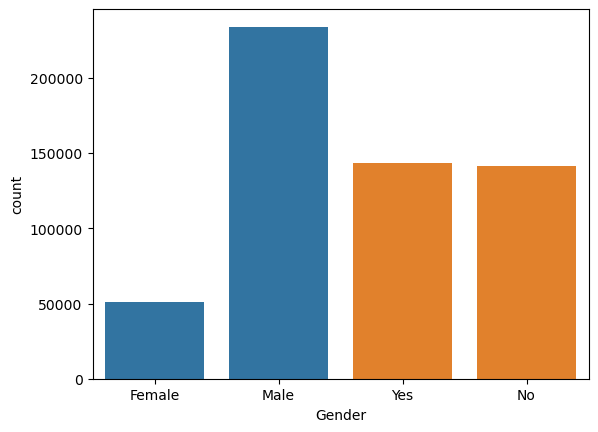

In [81]:
sns.countplot(data=df, x='Gender')
sns.countplot(data=df, x='treatment')

**# Bar Plots**

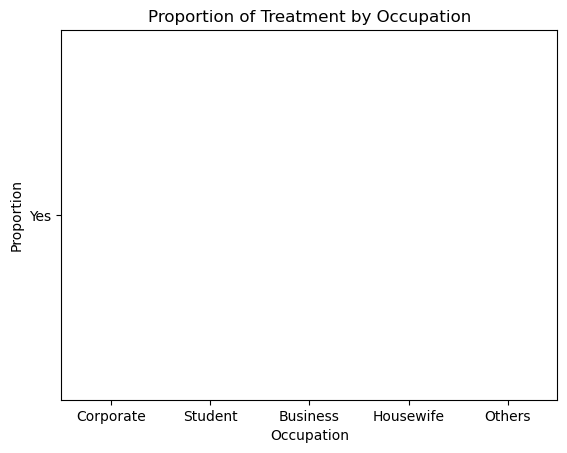

In [83]:
sns.barplot(data=df, x='Occupation', y='treatment', estimator=lambda x: (x == 'yes').mean())
plt.title('Proportion of Treatment by Occupation')
plt.ylabel('Proportion')
plt.show()

## **FEATURE ENGINEERING**

**Create a Label Encoder object**

In [85]:
# Initialize the encoder
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['self_employed','family_history','treatment','Days_Indoors','Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview']

# Applying LabelEncoder to each column
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])
df

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,0,1,1,0,2,1,2,2,0,1,2,0,Yes
4,Female,United States,Corporate,0,1,1,0,2,1,2,2,0,1,2,1,Yes
5,Female,Poland,Corporate,0,0,1,0,2,1,2,2,0,1,2,0,Not sure
6,Female,Australia,Corporate,0,1,1,0,2,1,2,2,0,1,2,1,Not sure
7,Female,United States,Corporate,0,0,0,0,2,1,2,2,0,1,2,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Male,United States,Business,1,1,1,1,1,0,1,1,1,1,0,0,Not sure
292360,Male,South Africa,Business,0,1,1,1,1,0,1,1,1,1,0,1,Yes
292361,Male,United States,Business,0,1,0,1,1,0,1,1,1,1,0,1,No
292362,Male,United States,Business,0,1,1,1,1,0,1,1,1,1,0,1,Yes


In [87]:
df.dtypes

Gender                     object
Country                    object
Occupation                 object
self_employed               int32
family_history              int32
treatment                   int32
Days_Indoors                int32
Growing_Stress              int32
Changes_Habits              int32
Mental_Health_History       int32
Mood_Swings                 int32
Coping_Struggles            int32
Work_Interest               int32
Social_Weakness             int32
mental_health_interview     int32
care_options               object
dtype: object

In [89]:
cat_col = df.select_dtypes(include=['object']).columns
cat_col

Index(['Gender', 'Country', 'Occupation', 'care_options'], dtype='object')

In [91]:
df.dtypes

Gender                     object
Country                    object
Occupation                 object
self_employed               int32
family_history              int32
treatment                   int32
Days_Indoors                int32
Growing_Stress              int32
Changes_Habits              int32
Mental_Health_History       int32
Mood_Swings                 int32
Coping_Struggles            int32
Work_Interest               int32
Social_Weakness             int32
mental_health_interview     int32
care_options               object
dtype: object

**One-Hot Encoding**

In [93]:
# List of categorical columns (those of type 'object')
categorical_columns = ['Gender', 'Country', 'Occupation', 'care_options']

# Apply get_dummies to these categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Now df_encoded contains the encoded columns
df_encoded.head()


,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,...,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,care_options_Not sure,care_options_Yes
3,0,1,1,0,2,1,2,2,0,1,...,False,False,False,True,True,False,False,False,False,True
4,0,1,1,0,2,1,2,2,0,1,...,False,False,False,True,True,False,False,False,False,True
5,0,0,1,0,2,1,2,2,0,1,...,False,False,False,False,True,False,False,False,True,False
6,0,1,1,0,2,1,2,2,0,1,...,False,False,False,False,True,False,False,False,True,False
7,0,0,0,0,2,1,2,2,0,1,...,False,False,False,True,True,False,False,False,False,False


In [95]:
df_encoded = df_encoded.astype(int)

In [97]:
df_encoded.head()

,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,...,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,care_options_Not sure,care_options_Yes
3,0,1,1,0,2,1,2,2,0,1,...,0,0,0,1,1,0,0,0,0,1
4,0,1,1,0,2,1,2,2,0,1,...,0,0,0,1,1,0,0,0,0,1
5,0,0,1,0,2,1,2,2,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,1,1,0,2,1,2,2,0,1,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,2,1,2,2,0,1,...,0,0,0,1,1,0,0,0,0,0


In [99]:
df_encoded.shape

(284858, 53)

In [101]:
df_encoded.dtypes

self_employed                     int32
family_history                    int32
treatment                         int32
Days_Indoors                      int32
Growing_Stress                    int32
Changes_Habits                    int32
Mental_Health_History             int32
Mood_Swings                       int32
Coping_Struggles                  int32
Work_Interest                     int32
Social_Weakness                   int32
mental_health_interview           int32
Gender_Male                       int32
Country_Belgium                   int32
Country_Bosnia and Herzegovina    int32
Country_Brazil                    int32
Country_Canada                    int32
Country_Colombia                  int32
Country_Costa Rica                int32
Country_Croatia                   int32
Country_Czech Republic            int32
Country_Denmark                   int32
Country_Finland                   int32
Country_France                    int32
Country_Georgia                   int32


**# Define features and target**

In [103]:
X = df_encoded.drop(['treatment'], axis=1)
y = df_encoded['treatment']
X

,self_employed,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,...,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,care_options_Not sure,care_options_Yes
3,0,1,0,2,1,2,2,0,1,2,...,0,0,0,1,1,0,0,0,0,1
4,0,1,0,2,1,2,2,0,1,2,...,0,0,0,1,1,0,0,0,0,1
5,0,0,0,2,1,2,2,0,1,2,...,0,0,0,0,1,0,0,0,1,0
6,0,1,0,2,1,2,2,0,1,2,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,2,1,2,2,0,1,2,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,1,1,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
292360,0,1,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
292361,0,1,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
292362,0,1,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [98]:
y

3         1
4         1
5         1
6         1
7         0
         ..
292359    1
292360    1
292361    0
292362    1
292363    1
Name: treatment, Length: 284858, dtype: int32

**TRAIN,TEST AND SPLIT**

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227886, 52) (56972, 52)
(227886,) (56972,)


## **FEATURE SELECTION**

**# Random Forest Classifier for feature selection**

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42, max_depth=5)
rf.fit(X_train, y_train)

#Get feature importances
importances = rf.feature_importances_

#Create a DataFrame to view feature importances
import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

#  select the top N features
top_n_features = feature_importances.head(10)['Feature'].values  
print("Top 10 Features:", top_n_features)

#Select the top N features and reduce the dataset
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]


                           Feature  Importance
1                   family_history    0.409466
51                care_options_Yes    0.248400
11                     Gender_Male    0.081768
50           care_options_Not sure    0.050264
10         mental_health_interview    0.043365
22                  Country_France    0.032850
45           Country_United States    0.021908
28                  Country_Israel    0.013709
27                 Country_Ireland    0.011356
29                   Country_Italy    0.009883
36                  Country_Poland    0.008252
32             Country_Netherlands    0.007164
15                  Country_Canada    0.005942
0                    self_employed    0.005732
33             Country_New Zealand    0.005684
39               Country_Singapore    0.004037
20                 Country_Denmark    0.003934
44          Country_United Kingdom    0.003618
26                   Country_India    0.003602
24                 Country_Germany    0.003374
38           